In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [118]:
%matplotlib inline

In [139]:
import csv
import pandas as pd

from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

# Загрузка и фильтрация данных

In [9]:
titanic_data = pd.read_csv('train.csv')

In [19]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
# Удалить некоторые столбцы
titanic_data_filtered = titanic_data.drop(columns=['Name', 'PassengerId', 'Ticket'])

In [24]:
titanic_data_filtered.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Преобразовать другие
# sex → one hot
# cabin → binary
# embarked → one hot

In [32]:
# Заполнение пустых значений
titanic_data_filtered['Age'].fillna(titanic_data_filtered['Age'].mean(), inplace=True)
titanic_data_filtered['Cabin'].fillna(0, inplace=True)

In [37]:
titanic_data_filtered['Cabin'][titanic_data_filtered['Cabin'] != 0] = 1

d:\Anaconda3\envs\ml_itmo\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
titanic_data_filtered['Cabin'] = pd.to_numeric(titanic_data_filtered['Cabin'])

In [44]:
titanic_data_ready = pd.get_dummies(titanic_data_filtered)

In [45]:
titanic_data_ready

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,0,1,0,1,0
6,0,1,54.000000,0,0,51.8625,1,0,1,0,0,1
7,0,3,2.000000,3,1,21.0750,0,0,1,0,0,1
8,1,3,27.000000,0,2,11.1333,0,1,0,0,0,1
9,1,2,14.000000,1,0,30.0708,0,1,0,1,0,0


# Визуализация данных

In [143]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(titanic_data_ready.iloc[:, 1:].as_matrix(), titanic_data_ready.iloc[:, 0].as_matrix())
labels = titanic_data_ready.iloc[:, 0].as_matrix()

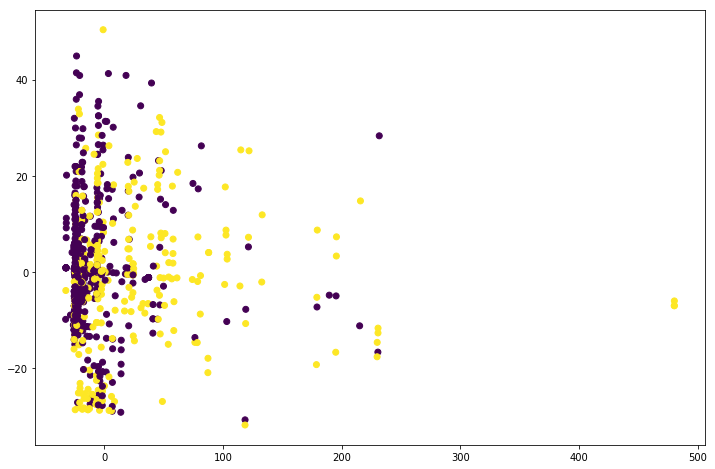

In [148]:
figsize(12, 8)
scatter(*pca_data.T, c=labels)
plt.legend(loc="lower right")

# Обучение моделей

In [54]:
 X_train, X_test, y_train, y_test = train_test_split(titanic_data_ready.iloc[:, 1:].as_matrix(), titanic_data_ready.iloc[:, 0].as_matrix(), test_size=0.2, random_state=42)

## Дерево принятия решений

In [64]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
clf_dt.score(X_test, y_test)

0.78770949720670391

### Важность признаков

In [76]:
for i, imp in enumerate(clf_dt.feature_importances_):
    print('Признак {}, важность {:.4f}'.format(titanic_data_ready.columns[1:][i], imp))

Признак Pclass, важность 0.1014
Признак Age, важность 0.2210
Признак SibSp, важность 0.0493
Признак Parch, важность 0.0321
Признак Fare, важность 0.2391
Признак Cabin, важность 0.0323
Признак Sex_female, важность 0.0000
Признак Sex_male, важность 0.3057
Признак Embarked_C, важность 0.0114
Признак Embarked_Q, важность 0.0000
Признак Embarked_S, важность 0.0077


## Логистическая регрессия

In [109]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
clf_lr.score(X_test, y_test)

0.81564245810055869

## SVM

In [125]:
clf_svm = LinearSVC()
clf_svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [126]:
clf_svm.score(X_test, y_test)

0.83798882681564246

## Построение ROC-кривой

In [128]:
y_score_lr = clf_lr.decision_function(X_test)
y_score_svm = clf_svm.decision_function(X_test)

In [130]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)

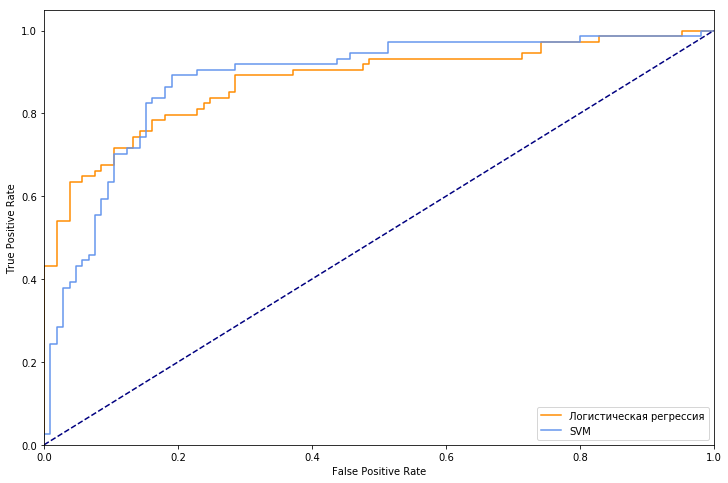

In [138]:
figsize(12, 8)
plot(fpr_lr, tpr_lr, color='darkorange', label='Логистическая регрессия')
plot(fpr_svm, tpr_svm, color='cornflowerblue', label='SVM')
plot([0, 1], [0, 1], color='navy', linestyle='--')
xlim([0.0, 1.0])
ylim([0.0, 1.05])
xlabel('False Positive Rate')
ylabel('True Positive Rate')
plt.legend(loc="lower right")